In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
advertising = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/Advertising.csv')
del advertising['Unnamed: 0']
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Lab 1

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 16 Sep 2015   Prob (F-statistic):           1.47e-42
Time:                        15:25:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

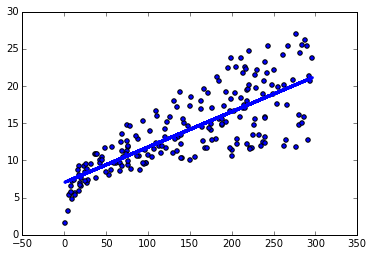

In [18]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Sales ~ TV', data=advertising)
results = model.fit()
print(results.summary())
plt.scatter(advertising['TV'],advertising['Sales'])
plt.plot(advertising['TV'], results.predict(pd.DataFrame(advertising['TV'])), color='blue',linewidth=3)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           4.35e-19
Time:                        17:33:25   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

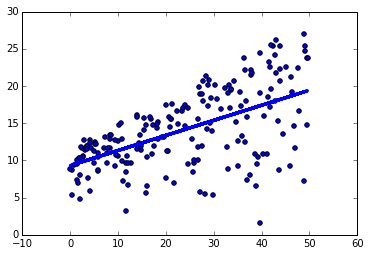

In [8]:

model = sm.ols(formula='Sales ~ Radio', data=advertising)
results = model.fit()
print(results.summary())
plt.scatter(advertising['Radio'],advertising['Sales'])
plt.plot(advertising['Radio'], results.predict(pd.DataFrame(advertising['Radio'])), color='blue',linewidth=3)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 15 Sep 2015   Prob (F-statistic):            0.00115
Time:                        17:34:36   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

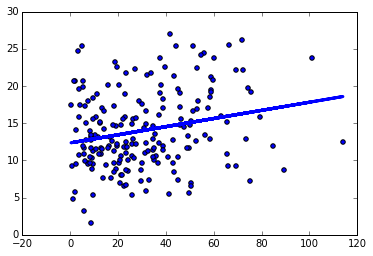

In [10]:

model = sm.ols(formula='Sales ~ Newspaper', data=advertising)
results = model.fit()
print(results.summary())
plt.scatter(advertising['Newspaper'],advertising['Sales'])
plt.plot(advertising['Newspaper'], results.predict(pd.DataFrame(advertising['Newspaper'])), color='blue',linewidth=3)

# Lab 2

In [15]:
model = sm.ols(formula='Sales ~ Newspaper + TV + Radio', data=advertising)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Sep 2015   Prob (F-statistic):           1.58e-96
Time:                        21:16:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [21]:
# Radio and newspaper and correlated so given radio then newspaper isn't that important
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [22]:
model = sm.ols(formula='Sales ~ TV + Radio', data=advertising)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 16 Sep 2015   Prob (F-statistic):           4.83e-98
Time:                        15:31:30   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

* If uncorrelated it's fine and coefficients can be estimated
* If correlated then a few problems
1. variance of coefficients will increase. For example, take all of one and put it on the other.
2. Interpretation becomes hazardous. We're assuming that the coefficient is the rate of change given the other values are fixed.
3. You can't make any casual statements because to do so you need to hold everything fixed and change the one element.
4. These coefficients are assuming all other predictors are in the model

# Lab 3

In [25]:
model = sm.ols(formula='Sales ~ TV + Radio + TV*Radio', data=advertising)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 16 Sep 2015   Prob (F-statistic):          6.68e-146
Time:                        16:51:25   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

* r-squared value increased from 0.897 to 0.968 change of (0.968-0.897)/(100-89.7)=69%
* All are good, but in general, for interpretation we usually keep the main effect
* increase in tv by one unit you get a sales increase of 0.0191+0.0011*Radio
* increase in radio by one unit you get a sales increase of 0.0289+0.0011*TV